# Exploratory Data Analysis on Haberman's Survival Dataset

Title - Haberman's Survival Dataset

Number of Instances : 306

Number of Attributes: 4 (including the class feature or attribute)

Attribute Information:

1)Age of patient at time of operation (numerical)

2)Patient's year of operation (year - 1900, numerical)

3)Number of positive axillary nodes detected (numerical)

4)Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

Missing Attribute Values: None

### objective: Classify the given patient Instance in to one of the two classes (1 or 2)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load haberman.csv into a pandas dataFrame.
haber=pd.read_csv('haberman.csv')
haber.columns = ['Age','Year_of_operation','Positive_nodes','Survived']


In [3]:
# (Q) how many data-points and features?
print (haber.shape)

(305, 4)


In [4]:
haber.head()

,Age,Year_of_operation,Positive_nodes,Survived
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [5]:
#(Q) What are the column names in our dataset?
print (haber.columns)

Index(['Age', 'Year_of_operation', 'Positive_nodes', 'Survived'], dtype='object')


In [6]:
print(haber['Survived'].value_counts())

1    224
2     81
Name: Survived, dtype: int64


### Observation :
    
    By seeing above valuecounts we can see that it is slightly Imbalanced Dataset as no of 2 class instances are much less than 1 class label

In [7]:
haber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
Age                  305 non-null int64
Year_of_operation    305 non-null int64
Positive_nodes       305 non-null int64
Survived             305 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


### Observation
As there are no null values we can directly go to analysing by plots

#  2-D Scatter Plot

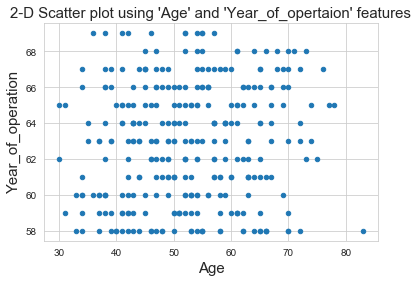

In [96]:
#2-D scatter plot:

haber.plot(kind='scatter', x='Age', y='Year_of_operation') ;

plt.title("2-D Scatter plot using 'Age' and 'Year_of_opertaion' features",size=15)
plt.xlabel('Age',size=15)
plt.ylabel('Year_of_operation',size=15)
plt.show()


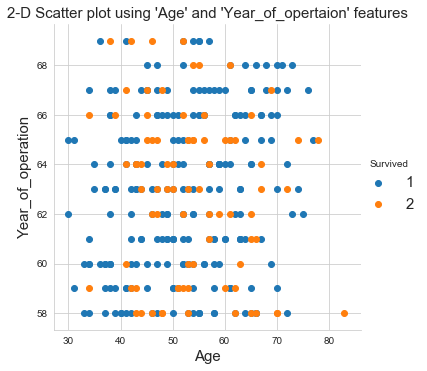

In [115]:
#cannot make much sense out it because of no differentiation of points. 
#so color the points by thier class-label-type

# 2-D Scatter plot with color-coding for each  class type.
# using seaborn to for colorig plots 
sns.set_style("whitegrid");
sns.FacetGrid(haber, hue="Survived", height=5) \
   .map(plt.scatter, "Age", "Year_of_operation") \
   .add_legend(prop={'size':15});

plt.title("2-D Scatter plot using 'Age' and 'Year_of_opertaion' features",size=15)
plt.xlabel('Age',size=15)
plt.ylabel('Year_of_operation',size=15)
plt.show();

# Notice that the blue points cannot be easily seperated from orange

# observation

From above we can see that there are lot of overlapping points in it.
But by carefull observation we can say that the 
if Age<=40:
    print('1')
that is live for more than five years
    
But there are only three 2 valued data points are  missclassified.
Other than this we cannot get anything from above plot.

#   Pair-plot

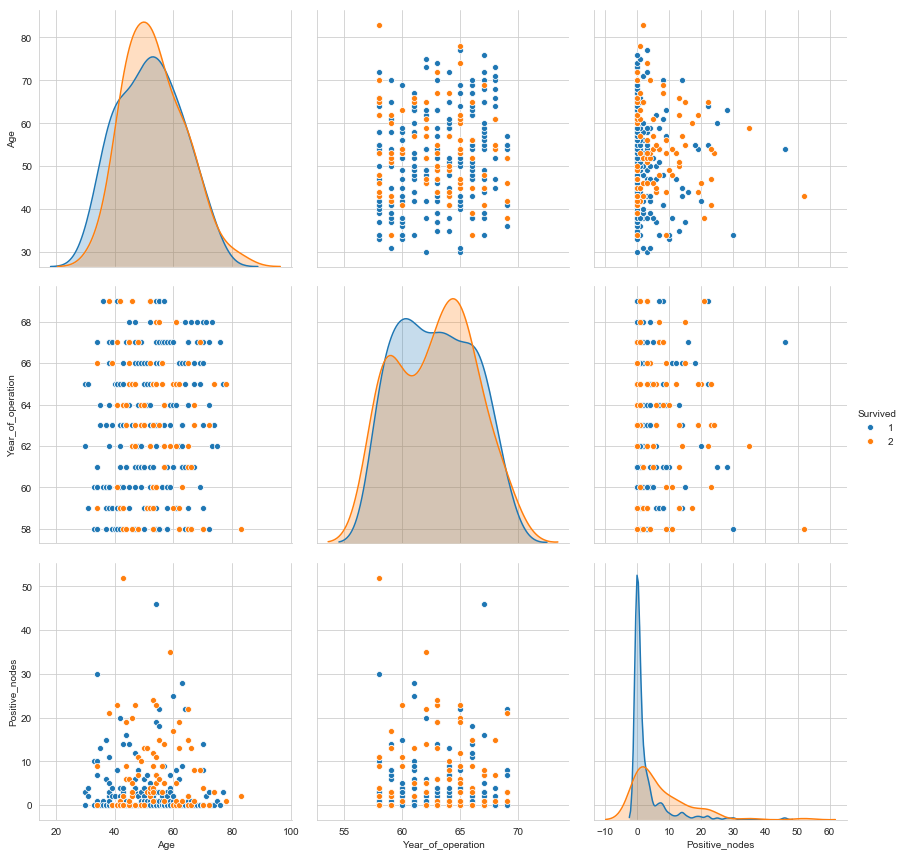

In [92]:
# See that there are only 3 features for analysing
#So by using pairwise scatter plot: Pair-Plot we can get much more details
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haber, hue="Survived", vars=['Age','Year_of_operation','Positive_nodes'],height=4);
plt.show()

## Observation:
1) From above pairwise scatter plot is no longer useful for this dataset because of extreme overlapping datapoints.

2) By using simple if-else conditions we cannot build a model for this classification problem

3) So by analysing using Histograms,PDF,CDF we can be able to get some information

#  Histogram, PDF, CDF

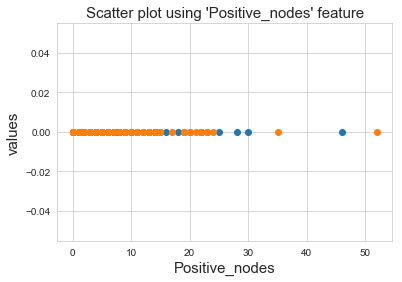

In [81]:
#1-D scatter plot using just one feature
#1-D scatter plot of Positive_nodes
import numpy as np
haber_1 = haber.loc[haber["Survived"] == 1];
haber_2 = haber.loc[haber["Survived"] == 2];

plt.plot(haber_1["Positive_nodes"], np.zeros_like(haber_1['Positive_nodes']), 'o')
plt.plot(haber_2["Positive_nodes"], np.zeros_like(haber_2['Positive_nodes']), 'o')
plt.title("Scatter plot using 'Positive_nodes' feature",size=15)
plt.xlabel("Positive_nodes",size=15)
plt.ylabel("values",size=15)
plt.show()


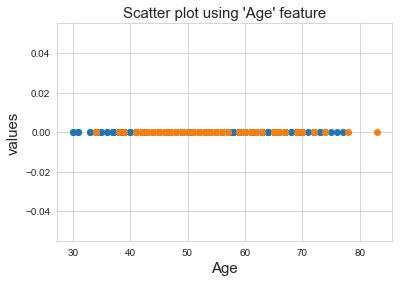

In [70]:
#1-D scatter plot using just one feature
import numpy as np
haber_1 = haber.loc[haber["Survived"] == 1];
haber_2 = haber.loc[haber["Survived"] == 2];

plt.plot(haber_1["Age"], np.zeros_like(haber_1['Age']), 'o')
plt.plot(haber_2["Age"], np.zeros_like(haber_2['Age']), 'o')
plt.title("Scatter plot using 'Age' feature",size=15)
plt.xlabel("Age",size=15)
plt.ylabel("values",size=15)
plt.show()

## Observation:

1)There is a lot of overlapping in the points.so It is difficult to classify by simply using 1-D plots

2)Further we can analyse through the distribution plots of points for more understanding.

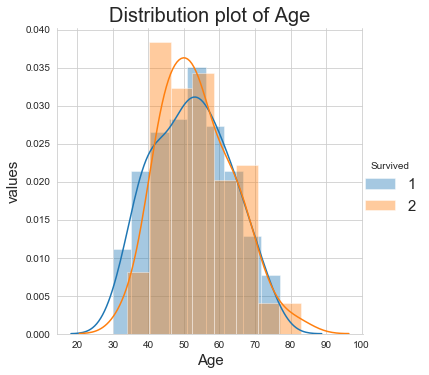

In [62]:
sns.FacetGrid(haber, hue="Survived", height=5) \
   .map(sns.distplot, "Age") \
   .add_legend(prop={'size':15});
plt.title("Distribution plot of Age",size=20)
plt.xlabel("Age",size=15)
plt.ylabel("values",size=15)
plt.show();



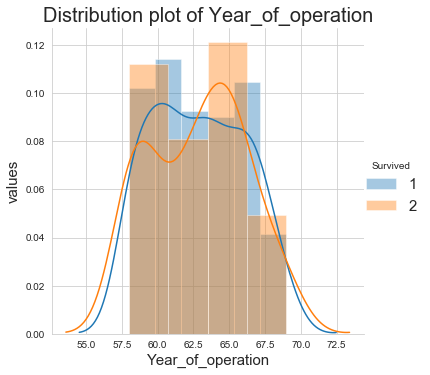

In [61]:
sns.FacetGrid(haber, hue="Survived", height=5) \
   .map(sns.distplot, "Year_of_operation") \
   .add_legend(prop={'size':15});
plt.title("Distribution plot of Year_of_operation",size=20)
plt.xlabel("Year_of_operation",size=15)
plt.ylabel("values",size=15)
plt.show();



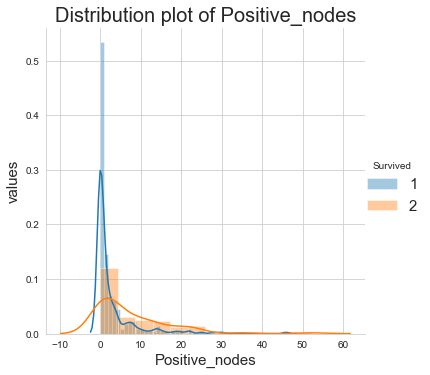

In [59]:
sns.FacetGrid(haber, hue="Survived", height=5) \
   .map(sns.distplot, "Positive_nodes") \
   .add_legend(prop={'size': 15});
plt.title("Distribution plot of Positive_nodes",size=20)
plt.xlabel("Positive_nodes",size=15)
plt.ylabel("values",size=15)
plt.show();



## Observation:

1)From above Distribution plots we can notice that there is no way of chance of classifying the points by using 'Age' and 'Year_of_operation' due to overlappig.

2)By using 'Positive_nodes' attribute we can write simple if else statements to classify but in that too we do not get more accuracy.

3)Comparingly 'Positive_nodes' attribute is better than others.


[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


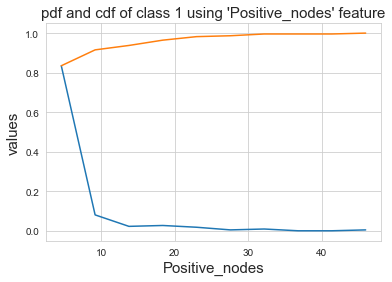

In [102]:
#Plot CDF of Positive_nodes

counts, bin_edges = np.histogram(haber_1['Positive_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.title("pdf and cdf of class 1 using 'Positive_nodes' feature",size=15)

plt.xlabel('Positive_nodes',size=15)
plt.ylabel("values",size=15)
plt.show();

[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


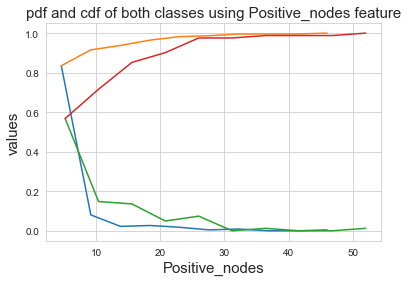

In [105]:
#cdf for class 1 using positive_nodes attribute
counts, bin_edges = np.histogram(haber_1['Positive_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# for class 2
counts, bin_edges = np.histogram(haber_2['Positive_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.title("pdf and cdf of both classes using Positive_nodes feature",size=15)
plt.xlabel("Positive_nodes",size=15)
plt.ylabel("values",size=15)
plt.show();

[0.04910714 0.10714286 0.125      0.09375    0.16517857 0.16517857
 0.09375    0.11160714 0.0625     0.02678571]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


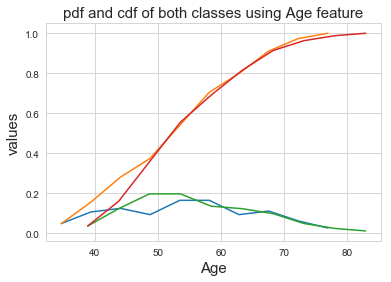

In [106]:
#cdf for class 1 using Age attribute
counts, bin_edges = np.histogram(haber_1['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# for class 2
counts, bin_edges = np.histogram(haber_2['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.title("pdf and cdf of both classes using Age feature",size=15)
plt.xlabel("Age",size=15)
plt.ylabel("values",size=15)
plt.show();

[0.1875     0.10714286 0.10267857 0.07142857 0.09821429 0.09821429
 0.06696429 0.09821429 0.09375    0.07589286]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


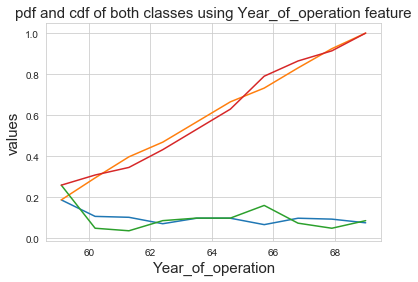

In [107]:
#cdf for class 1 using Year_of_operation
counts, bin_edges = np.histogram(haber_1['Year_of_operation'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# for class 2
counts, bin_edges = np.histogram(haber_2['Year_of_operation'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.title("pdf and cdf of both classes using Year_of_operation feature",size=15)
plt.xlabel("Year_of_operation",size=15)
plt.ylabel("values",size=15)
plt.show();

## Observation:

1)Due to the lot of overlapping in the data all the pdf's and cdf's curve are overlapping a lot .

2)Resulting that it is difficult to classify the data by using the univariate analysis.

In [21]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(haber_1["Positive_nodes"]))
#Mean with an outlier.
print(np.mean(np.append(haber_1["Positive_nodes"],50)));
print(np.mean(haber_2["Positive_nodes"]))

print("\nStd-dev:");
print(np.std(haber_1["Positive_nodes"]))
print(np.std(haber_2["Positive_nodes"]))

Means:
2.799107142857143
3.008888888888889
7.45679012345679

Std-dev:
5.869092706952767
9.128776076761632


## Observation:

1)Standard deviation is high for both classes therefore all the data points spread out over a wide range and also overlapping

In [22]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(haber_1["Age"]))
#Median with an outlier
print(np.median(np.append(haber_1["Age"],50)));
print(np.median(haber_2["Age"]))

print("\nQuantiles:")
print(np.percentile(haber_1["Age"],np.arange(0, 100, 25)))
print(np.percentile(haber_2["Age"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(haber_1["Age"],90))
print(np.percentile(haber_2["Age"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haber_1["Age"]))
print(robust.mad(haber_2["Age"]))



Medians:
52.0
52.0
53.0

Quantiles:
[30. 43. 52. 60.]
[34. 46. 53. 61.]

90th Percentiles:
67.0
67.0

Median Absolute Deviation
13.343419966550417
11.860817748044816


In [23]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(haber_1["Positive_nodes"]))
#Median with an outlier
print(np.median(np.append(haber_1["Positive_nodes"],50)));
print(np.median(haber_2["Positive_nodes"]))

print("\nQuantiles:")
print(np.percentile(haber_1["Positive_nodes"],np.arange(0, 100, 25)))
print(np.percentile(haber_2["Positive_nodes"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(haber_1["Positive_nodes"],90))
print(np.percentile(haber_2["Positive_nodes"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haber_1["Positive_nodes"]))
print(robust.mad(haber_2["Positive_nodes"]))



Medians:
0.0
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


## Observation:

1)If we observe for 'Age' attribute that median for both classes is almost same thereby we can conclude that the data is overlapped in a strong way that to classify.

2)From Quantiles 75 percent of data points of both classes are having the value less or equal to (52) and 53 almost same and also for 25%,100% they looking same number.

3)similarly for 'Positive_nodes' attribute we have same type of results.

#  Box plot and Whiskers

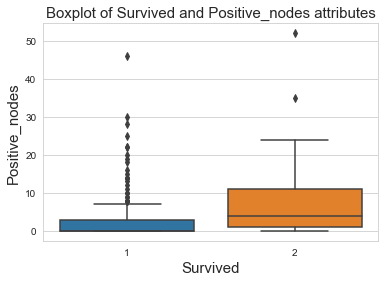

In [111]:

sns.boxplot(x='Survived',y='Positive_nodes', data=haber)
plt.title("Boxplot of Survived and Positive_nodes attributes",size=15)
plt.xlabel("Survived",size=15)
plt.ylabel("Positive_nodes",size=15)
plt.show()

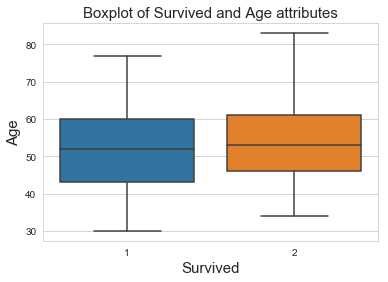

In [112]:

sns.boxplot(x='Survived',y='Age', data=haber)
plt.title("Boxplot of Survived and Age attributes",size=15)
plt.xlabel("Survived",size=15)
plt.ylabel("Age",size=15)
plt.show()

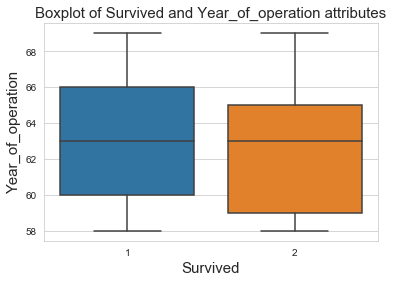

In [113]:

sns.boxplot(x='Survived',y='Year_of_operation', data=haber)
plt.title("Boxplot of Survived and Year_of_operation attributes",size=15)
plt.xlabel("Survived",size=15)
plt.ylabel("Year_of_operation",size=15)
plt.show()

## observation:

1)Clearly from above boxplots of all the three attributes shown that the data is overlapped and not possible to build a simple model using if else statements.

2)further techniques has to be performed to classify this dataset

#  Violin plots

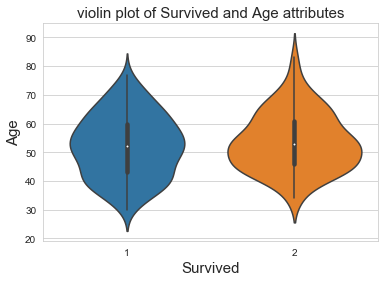

In [114]:
sns.violinplot(x="Survived", y="Age", data=haber, size=8)
plt.title("violin plot of Survived and Age attributes",size=15)
plt.xlabel("Survived",size=15)
plt.ylabel("Age",size=15)
plt.show()


#  Multivariate probability density, contour plot.


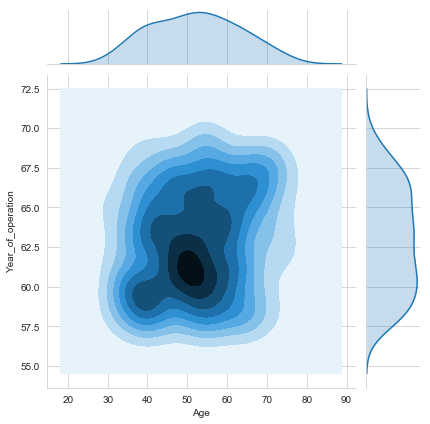

In [30]:
#2D Density plot, contors-plot
sns.jointplot(x="Age", y="Year_of_operation", data=haber_1, kind="kde");
plt.show();


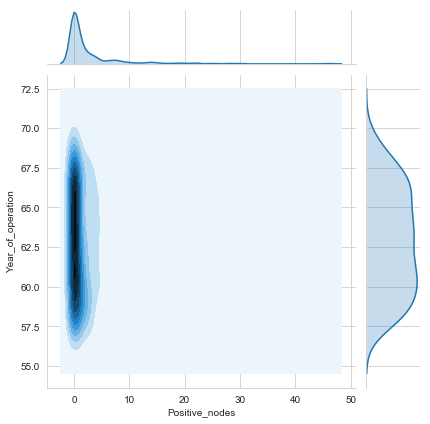

In [31]:
#2D Density plot, contors-plot
sns.jointplot(x="Positive_nodes", y="Year_of_operation", data=haber_1, kind="kde");
plt.show();


# Conclusions:

1)Haberman's is a imbalanced Dataset.

2)All the datapoints are overlapping and also with some outliers.

3)we cannot build a model using if else statements during this conditions,even if we try to do it ends up giving low accuracy.

4)By using Age and Year_of_opertaion scatter plot we can classify some of points but not completely.

5)we see that all the pdf's and cdf's plots are overlapping in each other.

6)we know that violin plots are the distribution of Box plots but just to see how pdf and boxplot are combined,they results same.

7)We can see that lot of points with Year_of_operation and Positive_nodes are btw 58 and 67 ,0 to 1

8)From all the univariate and bi-variate plots we observed that it is hard to classify the points based on attributes, visualizations.

9)Therefore further Preprocessing and other methods are required for the dataset to classify these data points.